In [1]:
import os
os.getcwd()

'C:\\Users\\MN\\Downloads'

In [3]:
import pandas as pd#import library


In [4]:
df = pd.read_csv("weight-height.csv")#import dataset

In [5]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [6]:
df.shape

(8555, 3)

# Data preprocessing

In [7]:
from sklearn.preprocessing import LabelEncoder#import  library
from sklearn.preprocessing import LabelEncoderx
label = LabelEncoder()

In [8]:
df.Gender = label.fit_transform(df.Gender)

In [9]:
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


# separete dependent and independent feature

In [11]:
x = df.drop('Weight', axis=1)#get independent feature

In [12]:
y = df['Weight']#get dependent variable

In [13]:
y.head()

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

In [14]:
x.head()

,Gender,Height
0,1,73.847017
1,1,68.781904
2,1,74.110105
3,1,71.730978
4,1,69.881796


# split data into train and testing

In [17]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=0.70, random_state=42) 

In [18]:
xtrain.shape

(5988, 2)

# KNN - Neighbors Regressor

In [39]:
from sklearn.neighbors import KNeighborsRegressor

In [40]:
knn_reg = KNeighborsRegressor()

In [41]:
knn_reg.fit(xtrain,ytrain)

KNeighborsRegressor()

In [42]:
knn_reg.score(xtest,ytest)

0.8821086423439015

In [49]:
pred = knn_reg.predict(xtest)

# Mean squared error

In [50]:
from sklearn.metrics import mean_squared_error

In [51]:
#mean squared error
men= mean_squared_error(ytest,pred) 

In [52]:
men

121.33528273624482

In [53]:
import math
rmen = math.sqrt(men)

In [56]:
rmen

11.015229581640359

# Linear Regression

In [57]:
from sklearn.linear_model import LinearRegression#Linear Regression
reg= LinearRegression()
reg.fit(xtrain,ytrain)#training our ml model

LinearRegression()

In [58]:
ypred=reg.predict(xtest)
print(ypred)

[142.44868114 186.0517281  198.42283706 ... 102.94080643 190.83713617
 143.34786753]


In [59]:
reg.predict([[ 1,65.58701702]])

array([166.40003137])

In [62]:
reg.score(xtest,ytest)

0.905911242442266

In [63]:
pred2 = reg.predict(xtest)
men2 = mean_squared_error(ytest,pred2)
men2

96.83734437830607

In [64]:
rmen2 = math.sqrt(men2)

In [65]:
rmen2#though we get rmen=11.01

9.840596749095354

# Hyper Parameter Optimization
Randomized Search CV

In [66]:

from sklearn.model_selection import RandomizedSearchCV

In [68]:
import numpy as np

In [69]:
n_neighbors = [int(x) for x in np.linspace(start = 20, stop = 300, num = 20)]
weights = ['uniform', 'distance']

# Create ids
gds = {'n_neighbors': n_neighbors,
         'weights': weights

        }

In [70]:
knn_reg2 = KNeighborsRegressor()

In [71]:
rmcv = RandomizedSearchCV(knn_reg2, gds, n_iter=100, cv=5)

In [72]:
rmcv.fit(xtrain,ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 40 is smaller than n_iter=100. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(), n_iter=100,
                   param_distributions={'n_neighbors': [20, 34, 49, 64, 78, 93,
                                                        108, 123, 137, 152, 167,
                                                        182, 196, 211, 226, 241,
                                                        255, 270, 285, 300],
                                        'weights': ['uniform', 'distance']})

In [73]:
rmcv.cv_results_

{'mean_fit_time': array([0.01440978, 0.00578594, 0.00435548, 0.00560369, 0.0135107 ,
        0.01156654, 0.00425296, 0.00468736, 0.00725608, 0.00577192,
        0.00597854, 0.00199432, 0.00637069, 0.00519519, 0.00440812,
        0.00318885, 0.00538673, 0.00537672, 0.0057827 , 0.0082449 ,
        0.00966129, 0.0043889 , 0.00419712, 0.00611901, 0.00531955,
        0.00568981, 0.00538907, 0.00477896, 0.005583  , 0.00318313,
        0.00417681, 0.        , 0.00378561, 0.00558395, 0.00131516,
        0.00313406, 0.00411997, 0.        , 0.00724535, 0.00738592]),
 'std_fit_time': array([0.01741753, 0.00073305, 0.00222852, 0.00048766, 0.00424388,
        0.00497509, 0.00265213, 0.00163699, 0.00219317, 0.00039389,
        0.00108981, 0.00244254, 0.00047413, 0.00099125, 0.00271094,
        0.0026291 , 0.00047836, 0.00048368, 0.00072522, 0.00629653,
        0.0049433 , 0.00223919, 0.00213291, 0.00513148, 0.0057175 ,
        0.00060677, 0.00048528, 0.0024682 , 0.00048249, 0.00262239,
        0.002

In [74]:
results = pd.DataFrame(rmcv.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_weights,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.014410,0.017418,0.007780,0.000747,uniform,20,"{'weights': 'uniform', 'n_neighbors': 20}",0.869377,0.896746,0.890456,0.898162,0.893741,0.889696,0.010499,9
1,0.005786,0.000733,0.007382,0.000489,distance,20,"{'weights': 'distance', 'n_neighbors': 20}",0.855189,0.879080,0.875828,0.880459,0.874941,0.873100,0.009182,40
2,0.004355,0.002229,0.014942,0.012044,uniform,34,"{'weights': 'uniform', 'n_neighbors': 34}",0.873552,0.899384,0.893171,0.901057,0.895360,0.892505,0.009882,3
3,0.005604,0.000488,0.008963,0.000883,distance,34,"{'weights': 'distance', 'n_neighbors': 34}",0.858532,0.882077,0.878922,0.883781,0.877632,0.876189,0.009095,39
4,0.013511,0.004244,0.000000,0.000000,uniform,49,"{'weights': 'uniform', 'n_neighbors': 49}",0.873411,0.900029,0.894434,0.901920,0.895063,0.892971,0.010188,1
5,0.011567,0.004975,0.005437,0.005845,distance,49,"{'weights': 'distance', 'n_neighbors': 49}",0.860071,0.883525,0.880698,0.885505,0.878895,0.877739,0.009122,38
6,0.004253,0.002652,0.016857,0.005576,uniform,64,"{'weights': 'uniform', 'n_neighbors': 64}",0.874052,0.899648,0.893661,0.902016,0.894770,0.892830,0.009879,2
7,0.004687,0.001637,0.015725,0.002540,distance,64,"{'weights': 'distance', 'n_neighbors': 64}",0.861088,0.884383,0.881434,0.886615,0.879561,0.878616,0.009092,37
8,0.007256,0.002193,0.033110,0.030871,uniform,78,"{'weights': 'uniform', 'n_neighbors': 78}",0.873771,0.899195,0.893023,0.902300,0.894180,0.892494,0.009947,4
9,0.005772,0.000394,0.017766,0.001714,distance,78,"{'weights': 'distance', 'n_neighbors': 78}",0.861717,0.884960,0.881843,0.887407,0.880009,0.879187,0.009098,36


In [75]:
rmcv.best_params_

{'weights': 'uniform', 'n_neighbors': 49}

In [76]:
rmcv.best_estimator_

KNeighborsRegressor(n_neighbors=49)

In [77]:
rmcv.best_score_

0.8929714447612985

In [78]:
best = rmcv.best_estimator_

In [79]:
best.score(xtest,ytest) #best = KNeighborsRegressor(n_neighbors=55)

0.903421017473401

# Use GridSearchCV

In [80]:
from sklearn.model_selection import GridSearchCV

In [82]:
gscv = GridSearchCV(knn_reg2, gds, cv=3)

In [83]:
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=3, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [20, 34, 49, 64, 78, 93, 108, 123, 137,
                                         152, 167, 182, 196, 211, 226, 241, 255,
                                         270, 285, 300],
                         'weights': ['uniform', 'distance']})

In [84]:
gscv.cv_results_

{'mean_fit_time': array([0.00764696, 0.00501315, 0.01563684, 0.0016617 , 0.00520666,
        0.00520651, 0.00520746, 0.0044202 , 0.00742054, 0.00332443,
        0.00431228, 0.00497746, 0.00466808, 0.00563725, 0.00500115,
        0.00498358, 0.00688855, 0.00299486, 0.01244084, 0.00466426,
        0.00696707, 0.00332348, 0.00465933, 0.00820899, 0.00521008,
        0.00332181, 0.00460919, 0.00164763, 0.00533072, 0.00501362,
        0.00820557, 0.00500504, 0.00332467, 0.00499312, 0.        ,
        0.00326594, 0.00502237, 0.00266004, 0.01043002, 0.00430433]),
 'std_fit_time': array([1.26716925e-03, 1.59503170e-03, 1.94914378e-05, 2.34999588e-03,
        7.36333541e-03, 7.36311063e-03, 7.36445933e-03, 3.94810673e-04,
        7.24941986e-03, 2.35072769e-03, 4.53336111e-04, 1.19795945e-05,
        4.80509064e-04, 4.65637663e-04, 2.15249713e-05, 3.31698048e-06,
        6.26730079e-03, 2.15571677e-03, 6.03692927e-03, 4.81612625e-04,
        2.83317473e-03, 2.48690846e-03, 4.69646934e-04, 5.264

In [85]:
result2 = pd.DataFrame(gscv.cv_results_)
result2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007647,0.001267,0.012633,0.000461,20,uniform,"{'n_neighbors': 20, 'weights': 'uniform'}",0.880344,0.894898,0.899217,0.891486,0.008073,6
1,0.005013,0.001595,0.006317,0.004485,20,distance,"{'n_neighbors': 20, 'weights': 'distance'}",0.861483,0.877590,0.879583,0.872885,0.008104,40
2,0.015637,0.000019,0.000000,0.000000,34,uniform,"{'n_neighbors': 34, 'weights': 'uniform'}",0.883568,0.896768,0.900397,0.893578,0.007231,1
3,0.001662,0.002350,0.015599,0.002727,34,distance,"{'n_neighbors': 34, 'weights': 'distance'}",0.865075,0.880457,0.882529,0.876020,0.007786,39
4,0.005207,0.007363,0.015621,0.000001,49,uniform,"{'n_neighbors': 49, 'weights': 'uniform'}",0.883408,0.897044,0.900095,0.893516,0.007255,2
5,0.005207,0.007363,0.015622,0.000006,49,distance,"{'n_neighbors': 49, 'weights': 'distance'}",0.866682,0.881975,0.884047,0.877568,0.007744,37
6,0.005207,0.007364,0.020727,0.007223,64,uniform,"{'n_neighbors': 64, 'weights': 'uniform'}",0.883277,0.896674,0.899982,0.893311,0.007222,3
7,0.004420,0.000395,0.023519,0.001552,64,distance,"{'n_neighbors': 64, 'weights': 'distance'}",0.867706,0.882803,0.884998,0.878502,0.007686,36
8,0.007421,0.007249,0.016189,0.006932,78,uniform,"{'n_neighbors': 78, 'weights': 'uniform'}",0.882751,0.895126,0.899279,0.892386,0.007020,4
9,0.003324,0.002351,0.027897,0.005954,78,distance,"{'n_neighbors': 78, 'weights': 'distance'}",0.868439,0.883064,0.885609,0.879038,0.007566,32


In [86]:
gscv.best_score_

0.8935780468558344

In [87]:
gscv.best_estimator_

KNeighborsRegressor(n_neighbors=34)

In [88]:
best2 = gscv.best_estimator_
best2.score(xtest,ytest)

0.902794604413257

In [89]:
gscv.best_estimator_

KNeighborsRegressor(n_neighbors=34)

# KNN Classifier with Python¶

In [90]:
df = pd.read_csv('weight-height.csv')

In [91]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

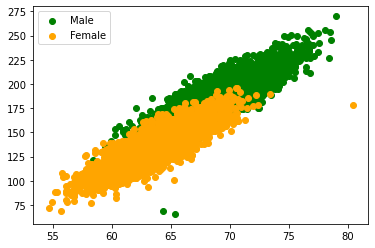

In [93]:
df0 = df[ df.Gender=='Male']
df1 = df[ df.Gender=='Female']

plt.scatter(df0['Height'],df0['Weight'],color='green',label='Male')
plt.scatter(df1['Height'],df1['Weight'],color='orange',label='Female')

plt.legend()

In [94]:
df['Gender'] = df.Gender.replace({'Male':0,'Female':1})

In [95]:
x = df.drop(['Gender'], axis=1)

In [96]:
y = df.Gender

In [97]:
x.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [98]:
#split train and test data
from sklearn.model_selection import train_test_split

In [99]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,train_size=.70,random_state=1)

In [100]:
from sklearn.neighbors import KNeighborsClassifier

In [101]:
knn2 = KNeighborsClassifier()

In [102]:
knn2.fit(xtrain,ytrain)

KNeighborsClassifier()

# Accuracy Score

In [103]:
knn2.score(xtest,ytest)

0.9146864043630697

In [104]:
knn2.predict(xtest)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

# Tuning

# Randomized Search CV

In [105]:
knn3 = KNeighborsClassifier()

In [107]:
rs2 = RandomizedSearchCV(knn3, gds, n_iter=200, cv=5)

In [108]:
rs2.fit(xtrain,ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 40 is smaller than n_iter=200. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=200,
                   param_distributions={'n_neighbors': [20, 34, 49, 64, 78, 93,
                                                        108, 123, 137, 152, 167,
                                                        182, 196, 211, 226, 241,
                                                        255, 270, 285, 300],
                                        'weights': ['uniform', 'distance']})

In [109]:
rs2.cv_results_

{'mean_fit_time': array([0.00406456, 0.00937347, 0.00312414, 0.00624895, 0.00412984,
        0.00725288, 0.00532856, 0.00395646, 0.        , 0.00312371,
        0.        , 0.00624967, 0.00312452, 0.00312552, 0.00312448,
        0.01562691, 0.00624828, 0.00312529, 0.        , 0.00312557,
        0.00936456, 0.        , 0.01249471, 0.00624986, 0.00685267,
        0.00312519, 0.006248  , 0.        , 0.00624847, 0.00624957,
        0.00312376, 0.00312557, 0.00625048, 0.        , 0.00312428,
        0.0062499 , 0.        , 0.00624757, 0.00312476, 0.01562304]),
 'std_fit_time': array([5.95525699e-03, 7.65341004e-03, 6.24828339e-03, 7.65337067e-03,
        6.08081185e-03, 7.07513540e-03, 5.71647113e-03, 6.11638144e-03,
        0.00000000e+00, 6.24742508e-03, 0.00000000e+00, 7.65424671e-03,
        6.24904633e-03, 6.25104904e-03, 6.24895096e-03, 3.20227306e-06,
        7.65255311e-03, 6.25057220e-03, 0.00000000e+00, 6.25114441e-03,
        7.64613570e-03, 0.00000000e+00, 6.24735404e-03, 7.654

In [110]:
results = pd.DataFrame(rs2.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_weights,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004065,0.005955,0.032397,0.002948,uniform,20,"{'weights': 'uniform', 'n_neighbors': 20}",0.907346,0.910684,0.912354,0.908939,0.927318,0.913328,0.007193,5
1,0.009373,0.007653,0.003124,0.006248,distance,20,"{'weights': 'distance', 'n_neighbors': 20}",0.898998,0.908180,0.908180,0.912281,0.924812,0.910490,0.008379,29
2,0.003124,0.006248,0.031242,0.000003,uniform,34,"{'weights': 'uniform', 'n_neighbors': 34}",0.904007,0.911519,0.915693,0.906433,0.926483,0.912827,0.007938,7
3,0.006249,0.007653,0.006249,0.007653,distance,34,"{'weights': 'distance', 'n_neighbors': 34}",0.900668,0.912354,0.910684,0.911445,0.926483,0.912327,0.008244,9
4,0.004130,0.006081,0.037366,0.012241,uniform,49,"{'weights': 'uniform', 'n_neighbors': 49}",0.903172,0.913189,0.914858,0.906433,0.927318,0.912994,0.008345,6
5,0.007253,0.007075,0.011641,0.005909,distance,49,"{'weights': 'distance', 'n_neighbors': 49}",0.902337,0.913189,0.914023,0.910610,0.928989,0.913830,0.008634,1
6,0.005329,0.005716,0.037641,0.005959,uniform,64,"{'weights': 'uniform', 'n_neighbors': 64}",0.899833,0.909850,0.914858,0.905597,0.931495,0.912327,0.010783,10
7,0.003956,0.006116,0.014793,0.001395,distance,64,"{'weights': 'distance', 'n_neighbors': 64}",0.902337,0.913189,0.914858,0.908939,0.928989,0.913662,0.008799,2
8,0.000000,0.000000,0.043736,0.006247,uniform,78,"{'weights': 'uniform', 'n_neighbors': 78}",0.898998,0.911519,0.912354,0.903926,0.932331,0.911826,0.011382,15
9,0.003124,0.006247,0.018746,0.006250,distance,78,"{'weights': 'distance', 'n_neighbors': 78}",0.901503,0.913189,0.913189,0.908939,0.929825,0.913329,0.009287,4


In [111]:
rs2.best_params_

{'weights': 'distance', 'n_neighbors': 49}

In [112]:
rs2.best_estimator_

KNeighborsClassifier(n_neighbors=49, weights='distance')

In [113]:
knn4 = rs2.best_estimator_

# Accuracy Score

In [114]:
knn4.score(xtest,ytest)

0.9216984807167901

# Save Training Model

In [115]:
import joblib as jbl
jbl.dump(knn4,'My2')

['My2']